In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
input_shape = (28,28,1)
#Input Channel is 1 because image is in grayscale

In [4]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
#Making sure that alues are float so we get decimal values in output

In [5]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [6]:
#Normalizing the data in range between 0 and 1
x_train=x_train/255
x_test=x_test/255
print("Shape of Training:",x_train.shape)
print("Shape of testing:",x_test.shape)

Shape of Training: (60000, 28, 28, 1)
Shape of testing: (10000, 28, 28, 1)


In [7]:
#Defining the model's architecture
model = Sequential()
model.add(Conv2D(28, kernel_size = (3,3), input_shape = input_shape))
#Adding 28 convolutional layers, setting size of oour filter and our input's size is same
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
#Converting into vector form to pass to the hidden layer
model.add(Dense(200, activation = "relu"))
#Hidden Layers
model.add(Dropout(0.3))
# 30% neurons removed
model.add(Dense(10, activation = "softmax"))
#Output Layer

/Users/harshavardhan/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4732)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       946,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 948,890 (3.62 MB)

 Trainable params: 948,890 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Traning the Model

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_t rain, y_train, epochs =2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9022 - loss: 0.3299
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9742 - loss: 0.0819


In [11]:
#Estimating the model's performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Acuracy = %.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9785 - loss: 0.0723
Loss=0.058
Acuracy = 0.983


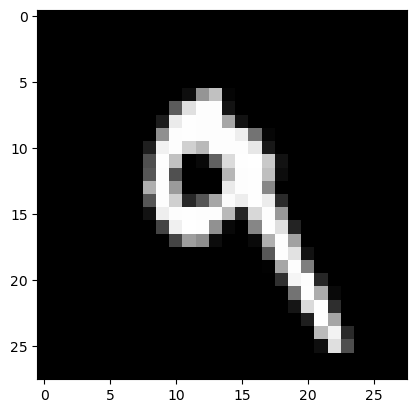

In [19]:
image = x_test[7]
plt.imshow(np.squeeze(image), cmap = 'gray')
plt.show()
#Squeeze removes any single dimensional entries in the input

In [20]:
image = image.reshape(1, image.shape[0],image.shape[1],image.shape[2])
predict_model = model.predict([image])
print("Predicted Class: {}".format(np.argmax(predict_model)))
#maximum probability of which class for the certain image is is done by argmax

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 9
